### 1. Выбор темы

### 2. Сбор данных

In [73]:
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

Преобразуем скаченные данные в DataFrame

In [74]:
wine = pd.read_csv('winequalityN.csv')
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 3. Предварительныя обработка данных

Давайте проанализируем данные, дадим определение переменным, выявим наличие пропусков в столбцах.

##### Описание переменных

###### Категориальная переменная: 

__type__ - тип вина (белое или красное)

###### Количественные переменные: 

1. __fixed acidity__ - фиксированная кислотность; данный тип кислот участвует в сбалансированности вкуса вина, привносит свежесть вкусу; с точки зрения процентного содержания кислоты, вино будет иметь кислотность от 0,6 до 0,7%. В данном датасете единица измерения г/дм3.

2. __volatile acidity__ - летучая кислотность; является мерой газообразных кислот вина; количество летучих кислот в вине часто считается показателем порчи. В среднем белых вин 1,2 г/л и 1,75 г/л для красных. В данном датасете единица измерения г/дм3.

3. __citric acid__	- лимонная кислота; является продуктом брожения виноградного сусла или мезги; до 2 г/дм3

4. __residual sugar__ - остаточный сахар; характеристика, показывающая количество сахара, который не был превращен в спирт в процессе ферментации вина; до 40 г/дм3. В данном датасете измеряется в процентах.

5. __chlorides__ - хлориды; характеризует бактериостатические и бактерицидные свойства вина. В данном датасете единица измерения г/дм3.

6. __free sulfur dioxide__	- свободный диоксид серы (диоксид серы, готовый вступить в реакцию, то есть стабилизировать вино); пищевая добавка, выполняющая функции консерванта

7. __total sulfur dioxide__ -  суммарный диоксид серы

8. __density__	- плотность; определяется в первую очередь концентрацией спирта и сахара. Белые, розовые и красные вина, как правило, легче воды — их плотность при температуре 20°С ниже 998,3 кг/м 3

9. __pH__ - кислотность; отвечает за способность напитка долго храниться и за его сочетаемость с различными блюдами; обычно колеблется в пределах 2,8-3,5

10. __sulphates__ - сульфаты; сульфаты меди и железа применяются виноградарями на стадии выращивания винограда для обработки лозы от болезней. Эти химические элементы в напитке предназначены для сохранения в продукте вкуса, цвета и запаха.

11. __alcohol__	- спирт; содержание в вине варьируется в пределах 4,5%-15%, а в крепленых — до 20%. 

###### Целевая переменная:

__quality__ - оценка качества от 0 до 10

Проверим наш датасет на наличие пропусков, а также посмотрим на типы данных в столбцах

In [75]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


Заметим, что в некоторых строках наблюдаются пропуски. Посчитаем их количество в переменных и далее решим, что с ними делать

In [76]:
wine.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

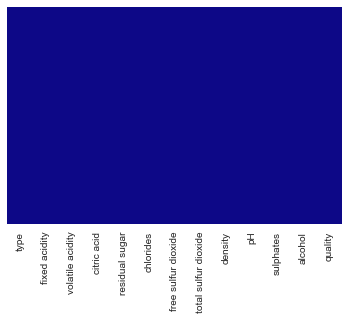

In [77]:
sns_heatmap = sns.heatmap(wine.isnull(), 
                          yticklabels=False, 
                          cbar=False, 
                          cmap='plasma')

Заметим, что количество строк, имеющих какие-либо пропуски, достаточно мало по сравнению с общим количеством наблюдений всего датасета и практически не видны на карте, поэтому выкинем строки без ущерба для данных.

In [78]:
wine = wine.dropna()
wine.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 4. Визуализация

##### Анализ переменных

Посмотрим на распределение целевой переменной, чтобы определить диапазон возможных значений и выявить наиболее часто встречающиеся оценки.

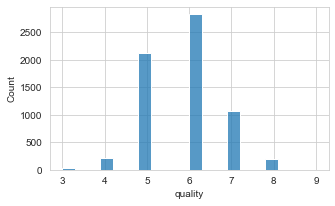

In [79]:
plt.figure(figsize=(5,3))
sns.histplot(wine.quality, bins=20);

Распредление оценки качества вина похоже на нормальное, что позволяет использовать параметрические методы статистики. Диапазон значений находится между 3 и 9 и особых выбросов не наблюдается.

Посмотрим на основные характеристики данных, такие как среднее, стандартное отклонение, квантили. Возможно в дальнейшем нам пригодится это для создания новых признаков или изменения существующих переменных (перевод в категориальыне, бинарные, интервальные признаки)

In [8]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Можно заметить некоторые скачки значений по столбцам. Например, остаточный сахар в среднем достигает значений около 5 г/дм3 при стандартном отклонении в 4,7 г/дм3 и квантиле 75% всего лишь 8 г/дм3 , однако максимальное значение зафиксировано на уровне 65,8 г/дм3. Медиана остаточного сахара находится в районе 3 г/дм3, в то время как среднее значительно больше. Вероятно, такое смещение происходит из-за выбросов. Такие же закономерности можно заметить в столбцах свободного и общего диоксидов серы, причем так как свободный диоксид серы влияет на показатели общего, можно предположить, что, обработов пропуски в столбце свободного диоксида серы, параллельно улучшится качество столбца с информацией о общем диоксиде серы. Аналогично, в столбце хлоридов максимальное значение в 12 раз превышает среднее при стандартном отклонении всего в 0,03 г/дм3, что свидетельствует о наличии выбросов. Построим гистограммы, всех переменных, чтобы сделать вывод о их видах их распределений, а затем отдельно расссмотрим переменные, описанные выше, чтобы проверить визуально наличие выбросов.

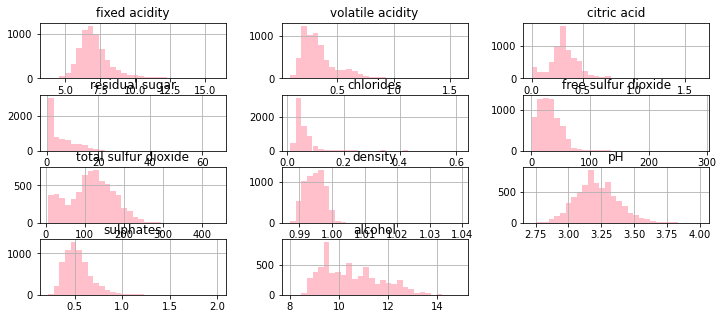

In [9]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
wine[columns].hist(figsize=(12, 5), bins=30, color = 'pink');

Некоторые распределения похожи на нормальное: fixed acidity, citric acid, chlorides, pH, что, как уже было сказано, позволяет использоать параметрические статистические методы; если говорить о других распределениях, можно заметить, что распределение  	residual sugar похоже на экспоненциальное, density и alcohol -  равномерное и volatile acidity, free sulfur dioxide и sulphates - распределение Фишера. 

Теперь проверим визуально выделенные ранее признаки на выбросы с помощью ящиков с усами, которые наиболее наглядно продемонстрируют наличие последних.

In [10]:
from math import ceil

In [11]:
def plot_boxplots(columns, num_cols=3):
    num_rows = ceil(len(columns)/num_cols)
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(16, num_rows*5))
    ax = ax.flatten()


    for index, feature in enumerate(columns):
        plot_axes = [ax[index]]

        sns.boxplot(
            y=wine[feature],
            x=wine.quality,
            ax=ax[index],
        )

        ax[index].set_title(f'{feature} box plot');
        ax[index].set_xlabel(None)

    for index in range(index+1, len(ax)):
        ax[index].axis('off')

    plt.tight_layout()

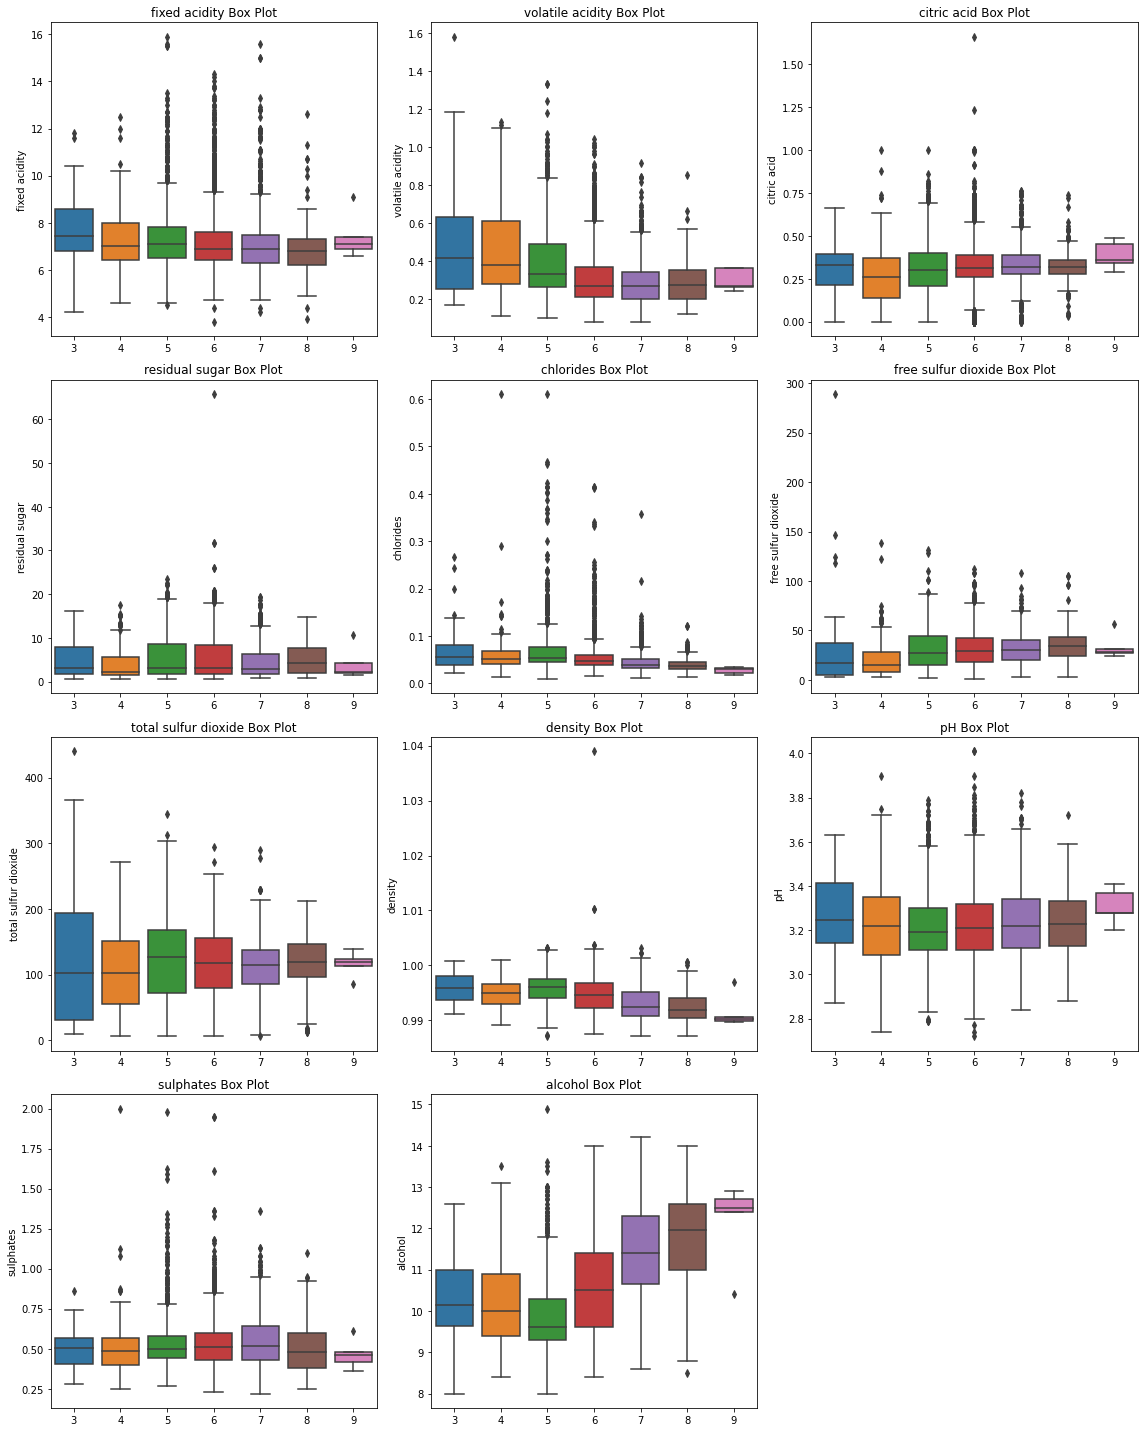

In [12]:
plot_boxplots(columns)

Что можно заметить из данных графиков:
1. Значительный объем выбросов наблюдаются среди переменных, связанных с кислотностью (первый ряд графиков), у хлоридов и сульфатов.
2. График содержания спирта (самый последний) демонстрирует тенденцию положительной зависимости качества вина и процентного содержания спирта. В дальнейшем следует проверить гипотезу о том, что __качественным винам соответсвует более высокое процентное содержание спирта__

Следует проверить, являются ли выбросы связанными, то есть содержаться они в одних и тех же строках или нет.

In [82]:
def detect_outliers(df, columns):
    outliers = {}
    for feature in columns:
        q1 = np.percentile(df[feature], 25)
        q3 = np.percentile(df[feature], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outliers[feature] = outlier_indices
    return outliers

outliers_dict = detect_outliers(wine, columns)

In [86]:
outliers_indices = set()
for feature in outliers_dict:
    outliers_indices.update(outliers_dict[feature])
print(f'Число уникальных строк с выбросами: {len(outliers_indices)}')

Число уникальных строк с выбросами: 1464


In [87]:
common_outliers_indices = set.intersection(*[set(outliers_dict[feature]) for feature in outliers_dict])
print(f'Число строк, содержащих несколько выбросов: {len(common_outliers_indices)}')

Число строк, содержащих несколько выбросов: 0


In [89]:
outliers_df = wine.loc[list(outliers_indices)]
print(outliers_df.head())

     type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   white            7.0              0.27         0.36           20.70   
7   white            7.0              0.27         0.36           20.70   
14  white            8.3              0.42         0.62           19.25   
20  white            6.2              0.66         0.48            1.20   
23  white            7.6              0.67         0.14            1.50   

    chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0       0.045                 45.0                 170.0   1.0010  3.00   
7       0.045                 45.0                 170.0   1.0010  3.00   
14      0.040                 41.0                 172.0   1.0002  2.98   
20      0.029                 29.0                  75.0   0.9892  3.33   
23      0.074                 25.0                 168.0   0.9937  3.05   

    sulphates  alcohol  quality  
0        0.45      8.8        6  
7        0.45      8.8        

Исходя из нашего исследования, все выбросы единичны для каждого вина, то есть в наших наблюдениях нет вин, которые отличаются значительно сразу по нескольким характеристикам от остальных, следовательно, удалять их было бы нерационально. Тем не менее, у фиксированной кислотности и хлоридов наблюдаются сильные отклоения, которые могут негативно влиять на дальнейшую работу с данными, поэтому почистим данные признаки: 

In [90]:
wine = wine.drop(wine[wine['fixed acidity'] >= wine['fixed acidity'].quantile(0.95)].index)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [14]:
wine = wine.drop(wine[wine['chlorides'] >= wine['chlorides'].quantile(0.95)].index)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [16]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000,5814.000000
mean,7.188089,0.336300,0.313117,4.871663,0.050652,30.208978,114.816649,0.994344,3.224591,0.525485,10.586179,5.853801
std,1.283786,0.162146,0.139542,3.934609,0.018533,17.170906,55.333931,0.002799,0.161434,0.136873,1.183625,0.880405
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.037000,17.000000,78.000000,0.992003,3.112500,0.430000,9.600000,5.000000
50%,7.000000,0.290000,0.310000,2.800000,0.046000,28.000000,117.000000,0.994500,3.210000,0.500000,10.400000,6.000000
75%,7.600000,0.400000,0.390000,7.500000,0.060000,41.000000,153.000000,0.996567,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.330000,1.660000,14.950000,0.102000,138.500000,344.000000,1.003200,4.010000,1.620000,14.900000,9.000000


Очевидно, в выборке преобладают наблюдения относительно белого вина. В дальнейшем заменим обозначения белого и красного вина на кодировку 0 и 1 в силу бинарности признака и для удобства анализа. 

Построим корреляционную матрицу по методу Пирсона, чтобы отследить взаимосвязь признаков, особенно влияние количественных признаков на показатели целевой переменной.

In [19]:
matrix_corr = wine.corr(method='pearson')
matrix_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.205021,0.322368,-0.102253,0.439501,-0.278295,-0.322632,0.498932,-0.266308,0.265895,-0.122262,-0.077848
volatile acidity,0.205021,1.000000,-0.413546,-0.185641,0.531295,-0.356607,-0.417207,0.306121,0.268776,0.190563,-0.052595,-0.262530
citric acid,0.322368,-0.413546,1.000000,0.157818,-0.145603,0.148324,0.219701,0.069435,-0.322829,0.029654,0.013264,0.102792
residual sugar,-0.102253,-0.185641,0.157818,1.000000,-0.155982,0.434319,0.501256,0.460972,-0.269359,-0.192402,-0.321942,0.000127
chlorides,0.439501,0.531295,-0.145603,-0.155982,1.000000,-0.303457,-0.407554,0.610696,0.225660,0.368010,-0.348581,-0.256466
free sulfur dioxide,-0.278295,-0.356607,0.148324,0.434319,-0.303457,1.000000,0.713904,-0.001409,-0.151172,-0.177907,-0.160330,0.085524
total sulfur dioxide,-0.322632,-0.417207,0.219701,0.501256,-0.407554,0.713904,1.000000,-0.013079,-0.226707,-0.277557,-0.245733,-0.024582
density,0.498932,0.306121,0.069435,0.460972,0.610696,-0.001409,-0.013079,1.000000,0.060605,0.278005,-0.705375,-0.308001
pH,-0.266308,0.268776,-0.322829,-0.269359,0.225660,-0.151172,-0.226707,0.060605,1.000000,0.250901,0.085484,0.008330
sulphates,0.265895,0.190563,0.029654,-0.192402,0.368010,-0.177907,-0.277557,0.278005,0.250901,1.000000,0.010257,0.074594


Для удобства построим визуализацию матрицы корреляций

Text(0.5, 1.0, 'Визуализация матрицы корреляций')

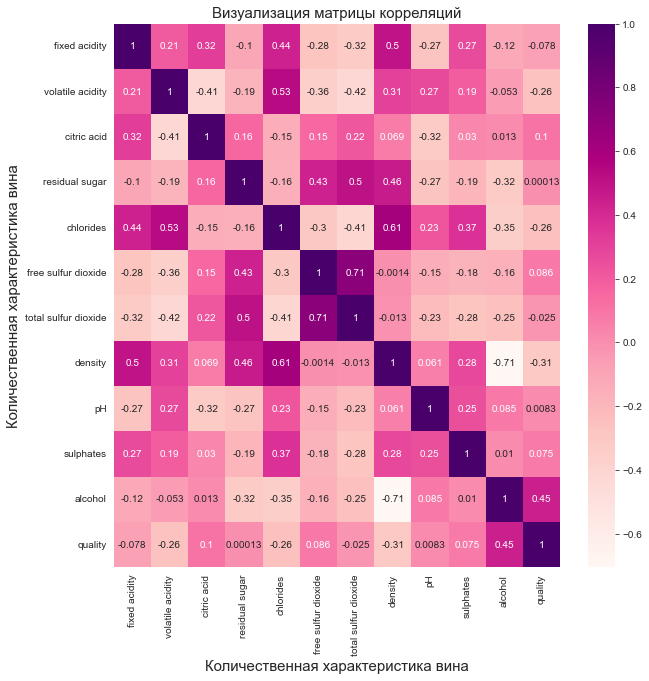

In [20]:
plt.figure(figsize = (10,10))

sns.heatmap(matrix_corr, cmap="RdPu", annot=True)

plt.xlabel('Количественная характеристика вина', fontsize=15)
plt.ylabel('Количественная характеристика вина', fontsize=15)
plt.title('Визуализация матрицы корреляций', fontsize=15)

__Взаимосвязи оценки качества вина с переменными:__
1. Наибольшая корреляция, как уже было сказано ранее замечена между качеством вина и содержанием спирта, тем не менее следует проверить и гипотезу.
2. Отрицательно коррелируют с оценкой вина летучая кислотность и плотность, то есть можно сделать предположение, что __ценятся вина с низким содержанием кислотности и более легкие__.
3. Целевая пременная практически никак линейно не зависит остаточного сахара, в дальнейшем, чтобы не удалять данный признак мы заменим его на категориальный, что, возможно, улучшит качество модели в части с машинными обучением

__Общее описание взаимосвязей переменных:__
1. Наиболее сильная положительная корреляция у фиксированной кислотности возникает с плотьностью вина, в то время как на количество спирта в вине и его качество эта переменная практически не влияет. Можно заметить, что фиксированная кислотность имеет примерно одинковоую корреляцию с содержанием лимонной кислоты, хлоридов и сульфатов.
2. Летутчая кислотность  довольно сильно отрицательно коррелирует с количеством лимонной кислоты и количеством диоксида серы (как свободного, так и суммарного). Примерно на одном уровне положительная корреляция летучей кислотности с фиксированной кислотностью, плотностью, кислотностью и сульфатами. Почти отсутсвует связь летучей кислотности и содержания спирта. А вот качество вина отрицательно зависит от летучей кислотности.
3. Ниболее значительная положительная корреляция у лимонной кислоты с фиксированной кислотностью, содержанием диоксида серы и остаточного сахара. Довольно сильная отрицательная корреляция прослеживается с летучей кислотностью. С остальными показателями корреляция составляет чуть больше нуля. На качество вина данный признак не влияет.
4. Сильную зависимость можно заметить между значением остаточного сахара с плотностью, а также к содержанием диоксида серы. Отрицательную корреляцию можно наблюдать между соедрданием остаточного сахара в вине и летучастями, хлоридами, кислотностью и сульфатами. Довольно сильную отрицательную корреляцию мы видим с количеством спирта. На качество вина данная переменная почти не влияет.
5. Наиболее сильная положительная корреляция у хлоридов с летучастями, плотностью и сульфатами. Наиболее значительная отрицательная корреляция заметна с значениями дикосида серы, соедржанием спирта и качествомм вина.
6. Самая сильная корреляция (среды всех переменных) наблюдается между значениями свободного диоксида серы и суммарного диоксида серы. 
7. Самое сильное положительное влияние на качество вина оказывает содержание спирта в вине.

Мы изучили количесвтенные переменные, но никах не визуализировали единственную категориальную, давайте посмотрим на распределение нашей бинарной качественной переменной type:

In [91]:
wine.describe(include='object')

,type
count,6127
unique,2
top,white
freq,4851


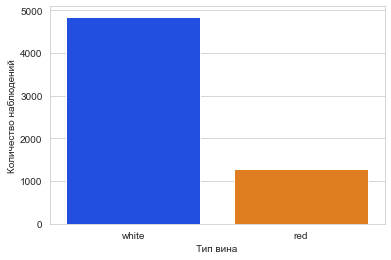

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='type',data=wine,palette='bright')
plt.xlabel("Тип вина")
plt.ylabel("Количество наблюдений")
plt.show() 

Очевидно, в выборке преобладают наблюдения относительно белого вина. В дальнейшем заменим обозначения белого и красного вина на кодировку 0 и 1 в силу бинарности признака и для удобства анализа. 

Построим диаграммы рассеивания качества вин и количественных переменных, имеющих наибольшую корреляцию по модулю (фиксированная кислотность, летучая кислотность, хлориды, плотность и содержание спирта), учитывая тип вина

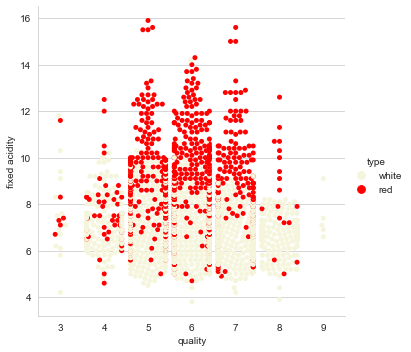

In [21]:
sns.catplot(data=wine, x='quality', y='fixed acidity', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

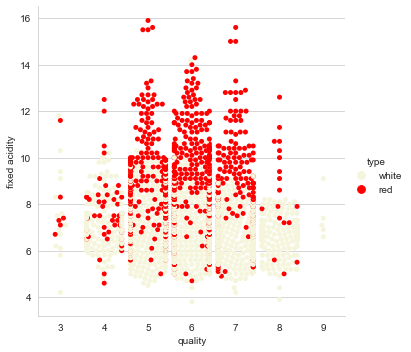

In [22]:
sns.catplot(data=wine, x='quality', y='fixed acidity', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

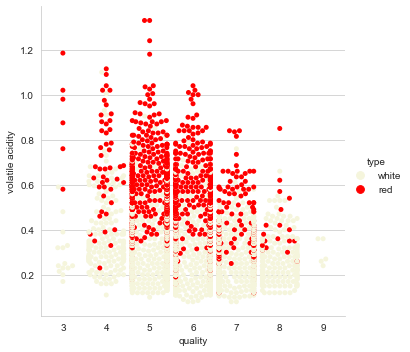

In [23]:
sns.catplot(data=wine, x='quality', y='volatile acidity', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

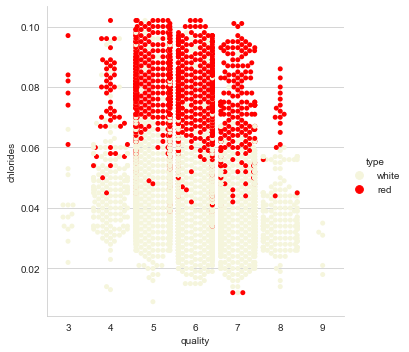

In [24]:
sns.catplot(data=wine, x='quality', y='chlorides', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

На диаграмме зависимости качества вина от фиксированной кислотности можно наблюдать довольно большое количество выбросов, которые в дальнейшем будут учтены. Также стоит отметить, что тип вина влияет на содержание переменной(фиксированная кислотность у красного вина как правило выше), это связано с особенностями производства.

Похожую ситуацию с выбросами можно наблюдать также на диаграммах с летучей кислотностью и хлоридами.

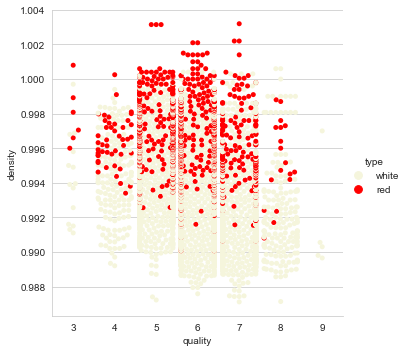

In [25]:
sns.catplot(data=wine, x='quality', y='density', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

Заметим, что визуально точки диаграммы рассеивания качества и плотности опускаются, то есть винам с более высокой оценкой качества соответствуют более низкие значения плотности. В дальнейшем можно будет проверить гипотезу о том, что качество вина отрицательно зависит от его плотности, менее  

Из диаграммы плотности можно понять, что белое вино зачастую обладает меньшей плотностью. Однако есть сорта белых вин имеющих плотность красных

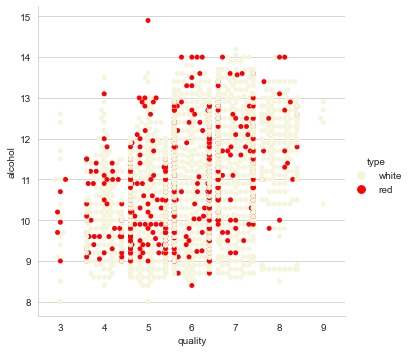

In [26]:
sns.catplot(data=wine, x='quality', y='alcohol', kind="swarm", hue='type', palette=sns.color_palette(['beige', 'red']))
plt.show()

Значения переменной разбросаны в хаотичном порядке, вследствие чего можно сделать вывод о том, что на рассматриваемый признак влияет не сорт винограда, а процедура изготовления. То же самое можно сказать и о содержании спирта в напитке.

Благодаря диаграммам рассеивания, стало понятно, что в зависимости от типа вина, можно наблюдать различия в значениях показателей. Попробуем проанализировать показатели вин, группируя их по цвету

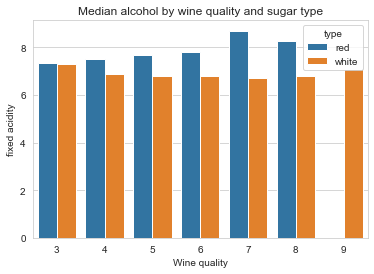

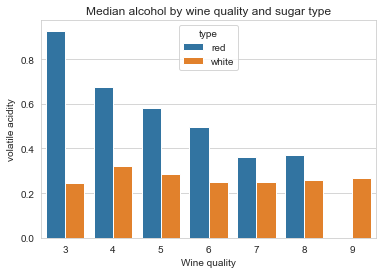

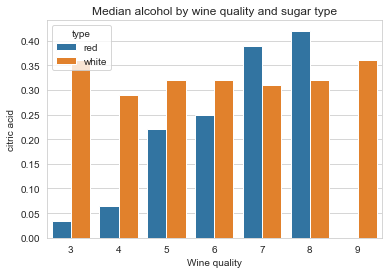

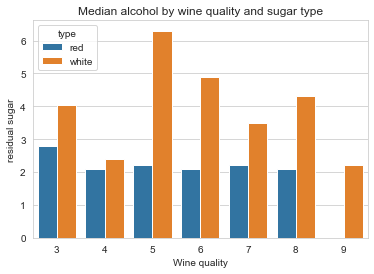

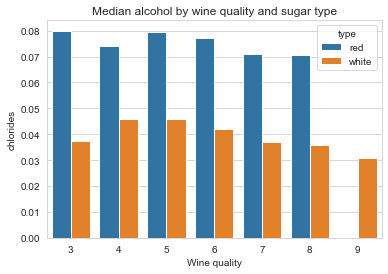

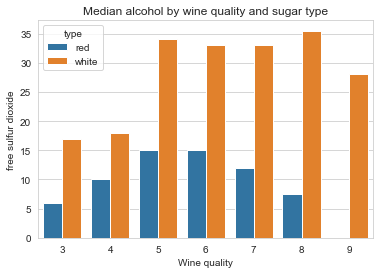

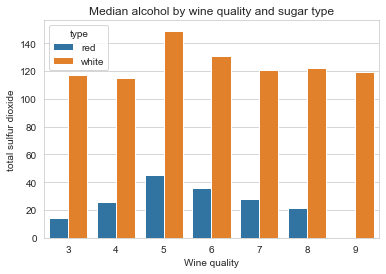

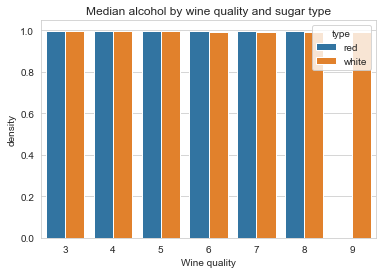

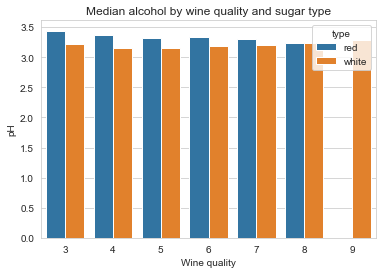

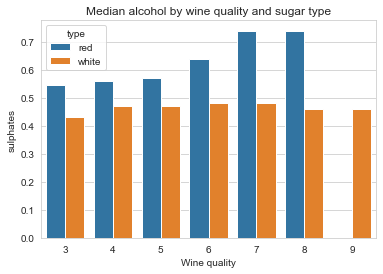

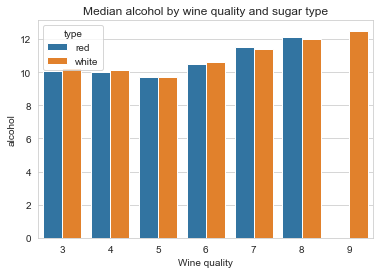

In [29]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for i in columns: 
    grouped_wine = wine.groupby(['quality', 'type'])[i].median().reset_index()
    sns.barplot(x='quality', y=i , hue='type', data=grouped_wine)
    plt.title("Median alcohol by wine quality and sugar type")
    plt.xlabel("Wine quality")
    plt.ylabel(i)
    plt.show()

1. Заметим, что у нас вообще нет красных вин, которые получили оценку 9, из этого следует сделать предположение, что __белое вино ценится выше, чем красное__
2. По столбцам белого вина можно сказать, что распределения на графиках похожи на равномерные, то есть химические показатели практически никак по отдельности не влияют на оценку, тем не менее, насчет красного вина таких общих выводов сделать нельзя: для летучей кислотности и лимонной кислотности наблюдаются отрицательный и положительный тренды. __Оценка красного вина падает с ростом содержания летучей кислотности и, наоборот, растет с ростом лимонной__.  

### 5. Создание новых переменных и обработка уже существующих

У нас очень много переменных, значения которых выражены дробными, малоотличающимися величинами, поэтому проведем категоризацию некоторых признаков в зависимости от интервала, в который поподает значение. 

##### Кислотность

Обычно кислотность вина не измеряют в числовых значениях, а вместо этого используют следующие категории: очень низкая кислотность, низкая, средняя, высокая и очень высокая. Для удобства категоризируем значения нашей пременной в соотвествии с определенной шкалой винной кислотности.  

У нас есть несколько переменных, отвечающих за кислотность. Данные переменные имеют одинаковые единицы измерения, фиксированная и летучая кислоты имеют слабую отрицательную корреляцию с каечством вина. Сложим данные переменных, а далее категоризируем.

In [30]:
wine["acidity"] = wine['fixed acidity'] + wine['volatile acidity']

In [31]:
categories = {
    "очень низкая": lambda x: x < 3,
    "низкая": lambda x: 3 <= x < 5,
    "средняя": lambda x: 5 <= x < 7,
    "высокая": lambda x: 7 <= x < 9,
    "очень высокая": lambda x: x >= 9
}

def categorize(value):
    for category, condition in categories.items():
        if condition(value):
            return category

wine["acidity"] = wine["acidity"].apply(categorize)

wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,средняя
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,высокая
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,высокая
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,высокая
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,высокая
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,высокая
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,средняя
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,средняя
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,средняя


##### Сахаристость 

Содержание сахара также влияет на принадлежность вина к определенной категории. В зависимости от процентного содержания сахара различают сухие, полусухие, полусладкие и сладкие вина. Создадим на основе числовой переменной residual sugar категориальную переменную, показывающую к какому типу вина по содержанию остаточного сахара оно относится. 

In [32]:
categories = {
    "сухое": lambda x: x < 0.5,
    "полусухое": lambda x: 0.5 <= x < 2,
    "полусладкое": lambda x: 2 <= x < 6,
    "сладкое": lambda x: 6 <= x
}

def categorize(value):
    for category, condition in categories.items():
        if condition(value):
            return category

wine["sugar type"] = wine["residual sugar"].apply(categorize)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity,sugar type
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,средняя,полусухое
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,высокая,сладкое
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,высокая,сладкое
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,высокая,сладкое
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,высокая,сладкое
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,высокая,полусухое
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,средняя,полусладкое
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,средняя,полусладкое
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,средняя,полусладкое


Соотношение кислот и сахара в вине может оказывать значительное влияние на вкус, аромат, степень алкогольности и способность вина храниться. Например, большое количество кислоты может придать вину более свежий и яркий вкус, а большое количество сахара может сделать вино слаще и более густым. Значение этого соотношения определяется стилем вина и личными предпочтениями потребителя. 

In [33]:
wine['total acidity'] = wine['fixed acidity'] + wine['volatile acidity']
wine['acid-sugar ratio'] = wine['total acidity']/wine['residual sugar']


In [34]:
wine['quality'] = np.where(wine['quality'] >= 7, 1, 0)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity,sugar type,total acidity,acid-sugar ratio
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,средняя,полусухое,6.600,4.125000
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,высокая,сладкое,8.380,1.214493
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,высокая,сладкое,7.430,0.874118
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,высокая,сладкое,7.430,0.874118
5,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,высокая,сладкое,8.380,1.214493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0,высокая,полусухое,7.420,3.905263
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,средняя,полусладкое,6.800,3.400000
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,средняя,полусладкое,6.810,2.960870
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,средняя,полусладкое,6.545,3.272500


In [35]:
wine['acid-sugar ratio'].describe()

count    5814.000000
mean        2.887379
std         2.058593
min         0.370270
25%         0.938977
50%         2.710556
75%         4.377813
max        14.900000
Name: acid-sugar ratio, dtype: float64

Соотношение кислотности и сахаристости в вине говорит о его вкусовых характеристиках. Если вино имеет высокую кислотность и низкую сахаристость, то оно будет слишком терпким на вкус. Если же вино имеет низкую кислотность и высокую сахаристость, то оно будет мягким на вкус. Влияет ли данное соотношение на вероятность вина получить метку "качественное"? Ранее мы сделали переменную quality бинарной, посчитав, что будем считать качественным вино, получившее отметку 7 или выше. Проверим, можно ли считать, что вино, имеющее более терпкий вкус чаще классифицированно, как качественное. 

### 6. Проверка гипотез

##### 1. Вино с терпким вкусом и вино с мягким вкусом одинаково чсто встречается среди качественных вин

Чем выше кислотность и ниже сахаристость, тем больше значения переменной acid-sugar ratio. Выведем значение, в соответствии с которым будем отделять вина с терпким вкусом и мягким.

In [36]:
mean_acidity = wine['total acidity'].mean()
mean_sugar = wine ['residual sugar'].mean()
mean_acidity, mean_sugar

(7.524389404884767, 4.871663226694193)

In [37]:
benchmark = mean_acidity/mean_sugar
benchmark

1.5445216663695076

Посчитали бенчмарк для определения соотношения

In [38]:
a = wine[(wine['quality'] == 1)]
b = wine[(wine['quality'] == 0)]

Мы создали два дата фрейма с качественным и некачественным вином, далее рассчитаем доли вина с терпким вкусом в каждом дата фрейме 

In [39]:
a_len = len(a['acid-sugar ratio'])
dolya_a = len(a[(a['acid-sugar ratio'] >= benchmark)])/a_len
b_len = len(b['acid-sugar ratio'])
dolya_b = len(b[(b['acid-sugar ratio'] >= benchmark)])/b_len
dolya_a, dolya_b

(0.6217320261437909, 0.5943355119825708)

Уровень значимости: $5\%$

$$
\begin{aligned}
&H_0: \hspace{2mm} p_а = p_b \hspace{2mm} \text{(вино с терпким вкусом и вино с мягким вкусом одинаково чсто встречается среди качественных вин)} \\
&H_1: \hspace{2mm} p_a > p_b  \hspace{2mm} \text{(терпкие вина чаще считаются качественными)}
\end{aligned}
$$

In [40]:
alpha = 0.05
z_cr = sts.norm().ppf(1 - alpha/2)
pa=dolya_a
pb=dolya_b
na=a_len
nb=b_len

lower = pa - pb - 1*z_cr*(((pa)*(1-pa))/(na) + ((pb)*(1-pb))/(nb))**0.5
upper = pa - pb + 1*z_cr*(((pa)*(1-pa))/(na) + ((pb)*(1-pb))/(nb))**0.5

if lower > 0 :
    print("Нулевая гипотеза отвергается")
else:
    print("Нулевая гипотеза не отвергается")

Нулевая гипотеза не отвергается


Значит, наши предпосылки не верны в данных условиях, и вино с терпким вкусом и вино с мягким вкусом одинаково чсто встречается среди качественных вин, то есть терпкость вкуса не оказывает значительного влияния на оценку

##### 2. В среднем у качественных вин плотность ниже, чем у некачественных.

Из диаграммы рассеивания качества и плотности вин в зависимости от их типа видно, что вина, имеющие высокую оценку имеют большую концентрацию в области низких значений плотности. Говорит ли это о том, что менее плотные вина могут быть более качественными? 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{density, 0} = \mu_{density, 1} \\
& H_1: \mu_{density, 0} > \mu_{density, 1}
\end{aligned}
$$

В силу большого объема выборки и ЦПТ можно считать, что математическое ожидание равно стремится к среднему значению выборки.

In [94]:
alpha = 0.05

x1 = wine[(wine['quality'] == 0)].density
x2 = wine[(wine['quality'] == 1)].density
                                                                                
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)    
s = np.sqrt(((len(x1) - 1) * s1 + (len(x2) - 1) * s2) / (len(x1) + len(x2) - 2)) 
df = len(x2) + len(x1) - 2                                             
t = sts.t.ppf(1 - alpha/2, df)                             

lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s

print ('95% доверительный интервал для разности мат ожиданий, дисперсии неизвестны:', (lower, upper))
if lower > 0 :
    print("Нулевая гипотеза отвергается")
else:
    print("Нулевая гипотеза не отвергается")

ZeroDivisionError: division by zero

Гипотеза отвергается, значит, действительно более легкие вина ценятся больше, и чаще признаются качественными

##### 3. Вино с более высоким содержанием спирта будет иметь более высокую оценку качества. 

Уровень значимости: $5\%$

$$
\begin{aligned}
& H_0: \mu_{high \ alcohol} = \mu_{0} \\
& H_1: \mu_{high \ alcohol} < \mu_{0}
\end{aligned}
$$

In [96]:
# создание двух выборок: с высоким и низким содержанием спирта
high_alcohol = wine[wine['alcohol'] >= wine['alcohol'].median()]
low_alcohol = wine[wine['alcohol'] < wine['alcohol'].median()]

# функция для получения статистики из выборки
def get_statistic(sample):
    return sample['quality'].mean()

# наивный бутстрап
n_iterations = 1000
high_alcohol_statistics = []
low_alcohol_statistics = []
for i in range(n_iterations):
    high_sample = high_alcohol.sample(frac=1, replace=True)
    low_sample = low_alcohol.sample(frac=1, replace=True)
    high_statistic = get_statistic(high_sample)
    low_statistic = get_statistic(low_sample)
    high_alcohol_statistics.append(high_statistic)
    low_alcohol_statistics.append(low_statistic)

diff_mean = np.mean(high_alcohol_statistics) - np.mean(low_alcohol_statistics)
print("Средняя оценка вина с высоким содержанием спирта: {:.2f}".format(np.mean(high_alcohol_statistics)))
print("Средняя оценка вина с низким содержанием спирта: {:.2f}".format(np.mean(low_alcohol_statistics)))
print("Разница между средними оценками: {:.2f}".format(diff_mean))

Средняя оценка вина с высоким содержанием спирта: 6.14
Средняя оценка вина с низким содержанием спирта: 5.48
Разница между средними оценками: 0.67


Гипотеза отвергнута, следовательно, наше исходное предположение имеет место быть:Вино с более высоким содержанием спирта будет иметь более высокую оценку качества

#####  4. Оценка  красного вина падает с ростом содержания летучей кислотности

In [97]:
wine_df = pd.read_csv('winequalityN.csv')

In [98]:
high_volatile = wine_df[wine_df['volatile acidity'] >= wine_df['volatile acidity'].median()]
low_volatile = wine_df[wine_df['volatile acidity'] < wine_df['volatile acidity'].median()]

# наивный бутстрап
n_iterations = 1000
high_volatile_statistics = []
low_volatile_statistics = []
for i in range(n_iterations):
    high_sample = high_volatile.sample(frac=1, replace=True)
    low_sample = low_volatile.sample(frac=1, replace=True)
    high_statistic = get_statistic(high_sample)
    low_statistic = get_statistic(low_sample)
    high_volatile_statistics.append(high_statistic)
    low_volatile_statistics.append(low_statistic)

# вывод результатов
diff_mean = np.mean(high_volatile_statistics) - np.mean(low_volatile_statistics)
print("Средняя оценка красного вина с высоким содержанием летучей кислотности: {:.2f}".format(np.mean(high_volatile_statistics)))
print("Средняя оценка красного вина с низким содержанием летучей кислотности: {:.2f}".format(np.mean(low_volatile_statistics)))
print("Разница между средними оценками: {:.2f}".format(diff_mean))

Средняя оценка красного вина с высоким содержанием летучей кислотности: 5.67
Средняя оценка красного вина с низким содержанием летучей кислотности: 5.98
Разница между средними оценками: -0.30


Разница значима (т.е. ее значение значительно меньше нуля), можно сделать вывод, что оценка качества красного вина падает с ростом содержания летучей кислотности

##### 5. Оценка красного вина растет с ростом лимонной кислотности

In [99]:
red_wine = wine[wine['type'] == 'red']

# градиентный бутстрап
n_iterations = 1000
corr_statistics = []
for i in range(n_iterations):
    sample = red_wine.sample(frac=1, replace=True)
    corr_statistic = sample[['quality', 'citric acid']].corr().iloc[0,1]
    corr_statistics.append(corr_statistic)

# вывод результатов
diff_mean = np.mean(corr_statistics)
print("Корреляция между оценкой качества красного вина и содержанием лимонной кислотности: {:.2f}".format(diff_mean))

Корреляция между оценкой качества красного вина и содержанием лимонной кислотности: 0.17


Cреднее значение корреляции больше нуля, можно сделать вывод, что оценка качества красного вина растет с ростом содержания лимонной кислотности.

In [114]:
red_wine = wine[wine['type'] == 'red']
white_wine = wine[wine['type'] == 'white']

# перестановочный тест
n_iterations = 1000
diff_statistics = []
for i in range(n_iterations):
    combined_data = pd.concat([red_wine['quality'], white_wine['quality']])
    permuted_data = np.random.permutation(combined_data)
    permuted_red_wine = permuted_data[:len(red_wine)]
    permuted_white_wine = permuted_data[len(red_wine):]
    diff_statistic = np.mean(permuted_white_wine) - np.mean(permuted_red_wine)
    diff_statistics.append(diff_statistic)

# вывод результатов
a = 0
for i in diff_statistics:
    if i >= np.mean(white_wine['quality']) - np.mean(red_wine['quality']):
        a += 1
p_value = a / n_iterations
if p_value < 0.05:
    print("Белое вино ценится больше красного (p-value = {:.3f})".format(p_value))
else:
    print("Нет достаточных доказательств, чтобы утверждать, что белое вино ценится больше красного (p-value = {:.3f})".format(p_value))

Белое вино ценится больше красного (p-value = 0.000)


### 7. Машинное обучение

In [47]:
wine['type'] = np.where(wine['type'] == 'red', 1, 0)
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity,sugar type,total acidity,acid-sugar ratio
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0,средняя,полусухое,6.60,4.125000
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,высокая,сладкое,8.38,1.214493
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,высокая,сладкое,7.43,0.874118
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0,высокая,сладкое,7.43,0.874118
5,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0,высокая,сладкое,8.38,1.214493


In [48]:
from sklearn.model_selection import train_test_split 

wine_train, wine_test = train_test_split(wine, test_size = 0.2, random_state=42)

In [49]:
wine_train

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity,sugar type,total acidity,acid-sugar ratio
6368,1,10.0,0.69,0.11,1.4,0.084,8.0,24.0,0.99578,2.88,0.47,9.7,0,очень высокая,полусухое,10.69,7.635714
30,0,8.5,0.24,0.39,10.4,0.044,20.0,142.0,0.99740,3.20,0.53,10.0,0,высокая,сладкое,8.74,0.840385
3201,0,7.9,0.34,0.44,6.5,0.027,47.0,126.0,0.99124,2.96,0.37,12.5,0,высокая,сладкое,8.24,1.267692
2524,0,7.5,0.41,0.23,14.8,0.054,28.0,174.0,0.99898,3.18,0.49,9.7,0,высокая,сладкое,7.91,0.534459
2162,0,9.9,0.49,0.23,2.4,0.087,19.0,115.0,0.99480,2.77,0.44,9.4,0,очень высокая,полусладкое,10.39,4.329167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4175,0,6.9,0.35,0.39,2.4,0.048,25.0,157.0,0.99133,3.20,0.54,11.1,1,высокая,полусладкое,7.25,3.020833
5797,1,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,0,очень высокая,полусладкое,9.32,2.741176
5835,1,12.0,0.63,0.50,1.4,0.071,6.0,26.0,0.99791,3.07,0.60,10.4,0,очень высокая,полусухое,12.63,9.021429
6016,1,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,0,высокая,полусладкое,7.49,3.566667


In [50]:
x_train = wine_train.drop(['quality', 'acidity', 'sugar type'], axis=1)

In [51]:
x_test = wine_test.drop(['quality', 'acidity', 'sugar type'], axis=1)

In [52]:
target = 'quality'

In [53]:
y_train = wine_train[target]

y_test = wine_test[target]

In [54]:
len(x_train)

4651

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [56]:
y_pred = logreg.predict(x_test)
print('Точность классификатора логистической регрессии на тестовом наборе: {:.2f}'.format(logreg.score(x_test, y_test)))

Точность классификатора логистической регрессии на тестовом наборе: 0.81


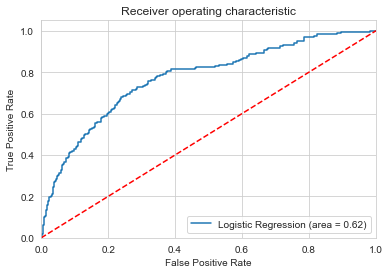

0.619375659405449

In [57]:

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
logit_roc_auc 

In [58]:
# accurancy

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8125537403267412

Мы провели логистическую регрессию исключив категориальные признаки, проведем тот же самый тест заменив категории.


In [59]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity,sugar type,total acidity,acid-sugar ratio
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,средняя,полусухое,6.600,4.125000
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,высокая,сладкое,8.380,1.214493
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,высокая,сладкое,7.430,0.874118
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,высокая,сладкое,7.430,0.874118
5,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,высокая,сладкое,8.380,1.214493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0,высокая,полусухое,7.420,3.905263
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,средняя,полусладкое,6.800,3.400000
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,средняя,полусладкое,6.810,2.960870
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,средняя,полусладкое,6.545,3.272500


In [60]:
new_wine =  wine
categories = {
    1: lambda x: x == "очень низкая",
    2: lambda x: x == "низкая",
    3: lambda x: x == "средняя",
    4: lambda x: x == "высокая",
    5: lambda x: x == "очень высокая"
}

def categorize(value):
    for category, condition in categories.items():
        if condition(value):
            return category

new_wine["acidity"] = new_wine["acidity"].apply(categorize)

categories = {
    1: lambda x: x == "сухое",
    2: lambda x: x == "полусухое",
    3: lambda x: x == "полусладкое",
    4: lambda x: x == "сладкое"
}

def categorize(value):
    for category, condition in categories.items():
        if condition(value):
            return category

new_wine["sugar type"] = new_wine["sugar type"].apply(categorize)
new_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,acidity,sugar type,total acidity,acid-sugar ratio
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,0,3,2,6.600,4.125000
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,4,4,8.380,1.214493
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,4,4,7.430,0.874118
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,0,4,4,7.430,0.874118
5,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,0,4,4,8.380,1.214493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,0,4,2,7.420,3.905263
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0,3,3,6.800,3.400000
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0,3,3,6.810,2.960870
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0,3,3,6.545,3.272500


In [61]:
new_wine_train, new_wine_test = train_test_split(new_wine, test_size = 0.2, random_state=42)

new_x_train = new_wine_train.drop('quality', axis=1)

new_x_test = new_wine_test.drop('quality', axis=1)


new_y_train = new_wine_train[target]

new_y_test = new_wine_test[target]
logreg = LogisticRegression()
logreg.fit(new_x_train, new_y_train)

new_y_pred = logreg.predict(new_x_test)
print('Точность классификатора логистической регрессии на тестовом наборе: {:.2f}'.format(logreg.score(new_x_test, new_y_test)))

Точность классификатора логистической регрессии на тестовом наборе: 0.81


In [112]:
print('Значение ROC_AUC на тестовом наборе: {:.2f}'.format(roc_auc_score(new_y_test, logreg.predict(new_x_test))))
print('Значение accurancy на тестовом наборе: {:.2f}'.format(accuracy_score(new_y_pred, new_y_test)))

Значение ROC_AUC на тестовом наборе: 0.62
Значение accurancy на тестовом наборе: 0.81


In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline